In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
seed: int = 42

In [3]:
import os

def get_data(filename:str) -> pd.DataFrame:
    return pd.read_csv(f"/kaggle/input/titanic/{filename}")

In [4]:
titanic = get_data("train.csv")
titanic_test = get_data("test.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
def courtesy_title(name: str) -> str:
    return name.split(',')[-1].split('.')[0].strip()

def group_courtesy_title(title: str) -> str:
    keep_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev')
    if title not in keep_titles:
        title = 'Other'
        
    return title

def add_column_present(df, colname):
    df[f"{colname}_present"] =  np.where(df[colname] != 'NaN', 1, 0)

In [8]:
titanic_copy = titanic.copy()

In [9]:
augusta_tyler = titanic.loc[titanic['Parch'] == 6]
titanic = titanic.drop(index=augusta_tyler.index)

In [10]:
titanic["title"] = titanic['Name'].apply(courtesy_title)

In [11]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')

In [12]:
titanic['title'] = titanic['title'].apply(group_courtesy_title)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
# PassengerId, Name, Ticket and Cabin are not very informative values
titanic = titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [14]:
titanic.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
title       False
dtype: bool

In [15]:
columns = ["Age", "Embarked"]
for column in columns:
    add_column_present(titanic, column)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [16]:
titanic["Embarked"] = titanic['Embarked'].replace(np.nan, "S")

In [17]:
titanic.isna().any()

Survived            False
Pclass              False
Sex                 False
Age                  True
SibSp               False
Parch               False
Fare                False
Embarked            False
title               False
Age_present         False
Embarked_present    False
dtype: bool

In [18]:
median_boy_age = titanic.loc[titanic.title.str.lower() == "master"]["Age"].median()
median_age_female = titanic.loc[titanic.Sex.str.lower() == "female"]["Age"].median()
median_men_age = titanic.loc[titanic.title.str.lower() != "master"][titanic.Sex.str.lower() == "male"]["Age"].median()

print(f"Median Boy Age -> {median_boy_age} || Median Female Age -> {median_age_female} || Median Men Age -> {median_men_age}")

Median Boy Age -> 3.5 || Median Female Age -> 27.0 || Median Men Age -> 30.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
### Need to update each of the  NAs per class.

titanic.loc[(titanic['Age'].isnull()) & (titanic["Sex"] == 'female'), 'Age'] = median_age_female
titanic.loc[(titanic['Age'].isnull()) & (titanic["title"].str.lower() == 'master'), 'Age'] = median_boy_age
titanic.loc[(titanic['Age'].isnull()) & (titanic["title"].str.lower() != 'master') & (titanic.Sex.str.lower() == "male"), 'Age'] = median_men_age

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [20]:
titanic.isna().any()

Survived            False
Pclass              False
Sex                 False
Age                 False
SibSp               False
Parch               False
Fare                False
Embarked            False
title               False
Age_present         False
Embarked_present    False
dtype: bool

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=0.2, random_state=seed, stratify=titanic[["Sex", "Pclass", "Survived"]])

In [22]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, FunctionTransformer


numeric_features = ["Age", "Fare"]
ordinal_features = ["Pclass"]
categorical_features = ["Sex", "SibSp", "Parch", "Embarked", "title", "Embarked_present", "Age_present"]

numeric_transformer = Pipeline([("scaler", RobustScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="error")
ordinal_transformer = OrdinalEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord", ordinal_transformer, ordinal_features),
    ]
)

In [23]:
y_train, y_test = train["Survived"], test["Survived"]
del train["Survived"]
del test["Survived"]

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

logit = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LogisticRegression(max_iter=250, random_state=seed, n_jobs=-1))])
logit.fit(train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'SibSp', 'Parch',
                                                   'Embarked', 'title',
                                                   'Embarked_present',
                                                   'Age_present']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=250, n_jobs=-1, random_state=42))])

In [25]:
logit.score(train, y_train)

0.8202247191011236

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from lightgbm import LGBMClassifier

classifiers = {
    "logit": Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LogisticRegression(max_iter=300, random_state=seed, n_jobs=-1))]),
    "rf": Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", RandomForestClassifier(random_state=seed, n_jobs=-1))]),
    "lbgm": Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LGBMClassifier(random_state=seed, n_jobs=-1))]),
    "neural": Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", MLPClassifier(random_state=seed))]),
    "ada": Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", AdaBoostClassifier(random_state=seed))]),
}

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

reports = []
kfold_results = []
names = []

for name, classifier in classifiers.items():
    names.append(name)
    
    # kfold
    kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    kfold_result = cross_val_score(classifier, train, y_train, cv=kfold, scoring='accuracy')
    kfold_results.append(kfold_result)
    
    # train test split
    classifier.fit(train, y_train)
    predictions = classifier.predict(test)
    reports.append({
        'name': name,
        'confusion': confusion_matrix(y_test, predictions),
        'accuracy': accuracy_score(y_test, predictions),
        'f1': f1_score(y_test, predictions)
    })

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

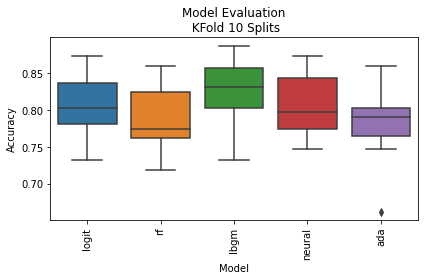

In [28]:
import seaborn as sns

g = sns.boxplot(data=kfold_results)
g.set_title('Model Evaluation\n KFold 10 Splits')
g.set_xlabel('Model')
g.set_ylabel('Accuracy')
g.set_xticklabels(names, rotation=90)
g.get_figure().tight_layout()

In [29]:
def print_model_stats(kfold_result, report):
    tn = report['confusion'][0][0] # True negative
    fp = report['confusion'][0][1] # False positive
    fn = report['confusion'][1][0] # False negative
    tp = report['confusion'][1][1] # True positive
    
    mr = 1 - report['accuracy'] # Misclassification rate
    tpr = tp / (fn + tp) # True positive rate
    fpr = fp / (tn + fp) # False positive rate
    spec = 1 - fpr # Specificity
    prec = tp / (fp + tp) # Precision    
    
    print('--------------------')
    print(report['name'])
    print('--------------------')
    print('F1 Score:        ', report['f1'])
    print('Accuracy:        ', report['accuracy'])
    print('Mean KFold (10): ', kfold_result.mean())
    print('Std. KFold (10): ', kfold_result.std())
    print('TPR:             ', tpr)
    print('FPR:             ', fpr)
    print('Specificity:     ', spec)
    print('Precision:       ', prec)
    print()
    
for kfold, report in zip(kfold_results, reports):
    print_model_stats(kfold_result, report)

--------------------
logit
--------------------
F1 Score:         0.7724137931034483
Accuracy:         0.8146067415730337
Mean KFold (10):  0.783607198748044
Std. KFold (10):  0.05231495094842259
TPR:              0.8235294117647058
FPR:              0.19090909090909092
Specificity:      0.8090909090909091
Precision:        0.7272727272727273

--------------------
rf
--------------------
F1 Score:         0.7313432835820897
Accuracy:         0.797752808988764
Mean KFold (10):  0.783607198748044
Std. KFold (10):  0.05231495094842259
TPR:              0.7205882352941176
FPR:              0.15454545454545454
Specificity:      0.8454545454545455
Precision:        0.7424242424242424

--------------------
lbgm
--------------------
F1 Score:         0.7692307692307693
Accuracy:         0.8146067415730337
Mean KFold (10):  0.783607198748044
Std. KFold (10):  0.05231495094842259
TPR:              0.8088235294117647
FPR:              0.18181818181818182
Specificity:      0.8181818181818181
Preci

In [30]:

from sklearn.model_selection import KFold


def optimization_step(trial, name, train, y_train):
    
    pipe = None
    
    if name == "rf":
        rf = {
            'bootstrap': trial.suggest_categorical("bootstrap", choices=["gini", "entropy"]),
            'max_depth': trial.suggest_int("max_depth", 3, 20),
            'max_features': trial.suggest_float("max_features", 0.01, 1.0),
            'min_samples_leaf': trial.suggest_int("min_samples_leaf", 3, 5),
            'min_samples_split': trial.suggest_int("min_samples_split", 3, 5),
            'n_estimators': trial.suggest_int("n_estimators", 200, 2000),
            "criterion": trial.suggest_categorical("criterion", choices=["gini", "entropy"])
        }
        
        pipe = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", RandomForestClassifier(**rf, random_state=seed, n_jobs=-1))])
        
    if name == "lgbm":
        lgbm = {
            "n_estimators": trial.suggest_int("n_estimators", 200, 2000),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "num_leaves": trial.suggest_int("num_leaves", 20, 120, step=20),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
        }
        
        pipe = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LGBMClassifier(**lgbm, random_state=seed, n_jobs=-1))])

    if name == "logit":
        logit = {
            'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
            'C' : trial.suggest_loguniform("C", 1e-2, 1),
            'solver' : trial.suggest_categorical('solver' , ['lbfgs','liblinear']),
        }
        
        pipe = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LogisticRegression(**logit, random_state=seed, n_jobs=-1))])
        
    kfold = KFold(n_splits=5)
    accuracies = []
    
    for train_indices, test_indices in kfold.split(train):
        xtrain, ytrain = train.iloc[train_indices], y_train.iloc[train_indices] 
        x_test, y_test = train.iloc[test_indices], y_train.iloc[test_indices]
        
        pipe.fit(xtrain, ytrain)
        y_pred = pipe.predict(x_test)
            
        fold_accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(fold_accuracy)
        
    return -1 * np.mean(accuracies)
    
    
    

In [31]:
import optuna
from functools import partial

import warnings
warnings.simplefilter('ignore')

# for name, classifier in tmp_classifiers.items():
# for model in ["rf", "logit"]:
optimization_function = partial(optimization_step, name="rf", train=train, y_train=y_train)

study = optuna.create_study(direction="minimize")
study.optimize(optimization_function, n_trials=30)
    
print("=========================================================================================================================")
rf_params = study.best_params
print("=========================================================================================================================")

[I 2022-10-07 19:42:36,485] A new study created in memory with name: no-name-1f0bd5fe-3c54-49b2-8368-1a454c60bb71
[I 2022-10-07 19:43:02,086] Trial 0 finished with value: -0.8244459765586527 and parameters: {'bootstrap': 'gini', 'max_depth': 14, 'max_features': 0.9959766773074242, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 1643, 'criterion': 'entropy'}. Best is trial 0 with value: -0.8244459765586527.
[I 2022-10-07 19:43:24,252] Trial 1 finished with value: -0.8244361272530287 and parameters: {'bootstrap': 'gini', 'max_depth': 6, 'max_features': 0.5167371526152674, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 1531, 'criterion': 'gini'}. Best is trial 0 with value: -0.8244459765586527.
[I 2022-10-07 19:43:31,204] Trial 2 finished with value: -0.8174037230375258 and parameters: {'bootstrap': 'gini', 'max_depth': 15, 'max_features': 0.20965487999533564, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 440, 'criterion': 'entropy'}. Best i

In [32]:
optimization_function = partial(optimization_step, name="lgbm", train=train, y_train=y_train)

study = optuna.create_study(direction="minimize")
study.optimize(optimization_function, n_trials=30)
    
print("=========================================================================================================================")
lgbm_params = study.best_params
print("=========================================================================================================================")

[I 2022-10-07 19:50:46,296] A new study created in memory with name: no-name-45d78074-aabf-4e0b-8ec6-6bbfb58d58d9
[I 2022-10-07 19:50:51,788] Trial 0 finished with value: -0.8132177681473456 and parameters: {'n_estimators': 1920, 'learning_rate': 0.013554220252303753, 'num_leaves': 80, 'max_depth': 6}. Best is trial 0 with value: -0.8132177681473456.
[I 2022-10-07 19:50:54,791] Trial 1 finished with value: -0.8090022653402935 and parameters: {'n_estimators': 756, 'learning_rate': 0.166135154845838, 'num_leaves': 120, 'max_depth': 7}. Best is trial 0 with value: -0.8132177681473456.
[I 2022-10-07 19:50:57,004] Trial 2 finished with value: -0.8118093174431202 and parameters: {'n_estimators': 394, 'learning_rate': 0.15871476475356552, 'num_leaves': 80, 'max_depth': 11}. Best is trial 0 with value: -0.8132177681473456.
[I 2022-10-07 19:50:59,366] Trial 3 finished with value: -0.7977740569289865 and parameters: {'n_estimators': 485, 'learning_rate': 0.2556354888742321, 'num_leaves': 120, 'm

In [33]:
optimization_function = partial(optimization_step, name="logit", train=train, y_train=y_train)

study = optuna.create_study(direction="minimize")
study.optimize(optimization_function, n_trials=30)
    
print("=========================================================================================================================")
logit_params = study.best_params
print("=========================================================================================================================")

[I 2022-10-07 19:52:14,708] A new study created in memory with name: no-name-ae341212-379e-4dad-957b-860c8a3d89ef
[I 2022-10-07 19:52:16,997] Trial 0 finished with value: -0.79068255687974 and parameters: {'tol': 0.0003005574934652094, 'C': 0.05464868817311245, 'solver': 'lbfgs'}. Best is trial 0 with value: -0.79068255687974.
[I 2022-10-07 19:52:17,487] Trial 1 finished with value: -0.80894316950655 and parameters: {'tol': 0.00031275185647577946, 'C': 0.3047084827485181, 'solver': 'lbfgs'}. Best is trial 1 with value: -0.80894316950655.
[I 2022-10-07 19:52:17,764] Trial 2 finished with value: -0.8005121638924455 and parameters: {'tol': 0.00021893568833406622, 'C': 0.22974051316011773, 'solver': 'liblinear'}. Best is trial 1 with value: -0.80894316950655.
[I 2022-10-07 19:52:18,154] Trial 3 finished with value: -0.7850684526740864 and parameters: {'tol': 0.00039592393810045117, 'C': 0.026557539364186956, 'solver': 'lbfgs'}. Best is trial 1 with value: -0.80894316950655.
[I 2022-10-07 1

In [34]:
from sklearn.ensemble import VotingClassifier

estimators = [("logit",LogisticRegression(**logit_params, random_state=seed, n_jobs=-1)),
                      ("rf", RandomForestClassifier(**rf_params, random_state=seed, n_jobs=-1)),
                      ("lgbm", LGBMClassifier(**lgbm_params, random_state=seed, n_jobs=-1))]

voting = VotingClassifier(estimators=estimators)
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", voting)])

pipe.fit(train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'SibSp', 'Parch',
                                                   'Embarked', 'title',
                                                   'Embarked_present',
                                                   'Age_present']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 VotingClassifier(estimators=[('logit',
                                               Logi

In [35]:
pipe.score(train, y_train)

0.8918539325842697

In [36]:
test.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'title', 'Age_present', 'Embarked_present'], dtype=object)

In [37]:
y_pred = pipe.predict(test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Voting Classifier: Accuracy -> {accuracy: .5f} | F1 Score -> {f1: .5f}")


Voting Classifier: Accuracy ->  0.84831 | F1 Score ->  0.80576


In [38]:
titanic_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [39]:
titanic_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [40]:
titanic_test["title"] = titanic_test['Name'].apply(courtesy_title)

titanic_test['title'] = titanic_test['title'].replace('Mlle', 'Miss')
titanic_test['title'] = titanic_test['title'].replace('Mme', 'Mrs')
titanic_test['title'] = titanic_test['title'].replace('Ms', 'Miss')

titanic_test['title'] = titanic_test['title'].apply(group_courtesy_title)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [41]:
columns = ["Age", "Embarked"]
for column in columns:
    add_column_present(titanic_test, column)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Age_present,Embarked_present
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,1,1


In [42]:
titanic_test = titanic_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,3,male,34.5,0,0,7.8292,Q,Mr,1,1
1,3,female,47.0,1,0,7.0000,S,Mrs,1,1
2,2,male,62.0,0,0,9.6875,Q,Mr,1,1
3,3,male,27.0,0,0,8.6625,S,Mr,1,1
4,3,female,22.0,1,1,12.2875,S,Mrs,1,1


In [43]:
titanic_test.isna().any()

Pclass              False
Sex                 False
Age                  True
SibSp               False
Parch               False
Fare                 True
Embarked            False
title               False
Age_present         False
Embarked_present    False
dtype: bool

In [44]:
first_class_median_fare = titanic.loc[titanic['Pclass'] == 1]["Fare"].median()
second_class_median_fare = titanic.loc[titanic['Pclass'] == 2]["Fare"].median()
third_class_median_fare = titanic.loc[titanic['Pclass'] == 3]["Fare"].median()

print(f"Median fare paid per class. 1st class -> {first_class_median_fare}, 2nd class -> {second_class_median_fare}, 3rd class -> {third_class_median_fare}")

Median fare paid per class. 1st class -> 60.287499999999994, 2nd class -> 14.25, 3rd class -> 8.05


In [45]:
titanic_test.loc[(titanic_test['Age'].isnull()) & (titanic_test["Sex"].str.lower() == 'female'), 'Age'] = median_age_female
titanic_test.loc[(titanic_test['Age'].isnull()) & (titanic_test["title"].str.lower() == 'master'), 'Age'] = median_boy_age
titanic_test.loc[(titanic_test['Age'].isnull()) & (titanic_test["title"].str.lower() != 'master') & (titanic_test.Sex.str.lower() == "male"), 'Age'] = median_men_age

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,3,male,34.5,0,0,7.8292,Q,Mr,1,1
1,3,female,47.0,1,0,7.0000,S,Mrs,1,1
2,2,male,62.0,0,0,9.6875,Q,Mr,1,1
3,3,male,27.0,0,0,8.6625,S,Mr,1,1
4,3,female,22.0,1,1,12.2875,S,Mrs,1,1


In [46]:
first_class_median = titanic.loc[titanic.Pclass == 1]["Fare"].median()
second_class_median = titanic.loc[titanic.Pclass == 2]["Fare"].median()
third_class_median = titanic.loc[titanic.Pclass == 3]["Fare"].median()

titanic_test.loc[(titanic_test['Fare'].isnull()) & (titanic_test["Pclass"] == 1), 'Fare'] = first_class_median
titanic_test.loc[(titanic_test['Fare'].isnull()) & (titanic_test["Pclass"] == 2), 'Fare'] = second_class_median
titanic_test.loc[(titanic_test['Fare'].isnull()) & (titanic_test["Pclass"] == 3), 'Fare'] = third_class_median

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,3,male,34.5,0,0,7.8292,Q,Mr,1,1
1,3,female,47.0,1,0,7.0000,S,Mrs,1,1
2,2,male,62.0,0,0,9.6875,Q,Mr,1,1
3,3,male,27.0,0,0,8.6625,S,Mr,1,1
4,3,female,22.0,1,1,12.2875,S,Mrs,1,1


In [47]:
titanic_test.isna().any()

Pclass              False
Sex                 False
Age                 False
SibSp               False
Parch               False
Fare                False
Embarked            False
title               False
Age_present         False
Embarked_present    False
dtype: bool

In [48]:
titanic_test["Parch"] = titanic_test['Parch'].replace(9, 6)

In [49]:
titanic_copy = get_data("train.csv")

In [50]:
titanic_copy["title"] = titanic_copy['Name'].apply(courtesy_title)

titanic_copy['title'] = titanic_copy['title'].replace('Mlle', 'Miss')
titanic_copy['title'] = titanic_copy['title'].replace('Mme', 'Mrs')
titanic_copy['title'] = titanic_copy['title'].replace('Ms', 'Miss')

titanic_copy['title'] = titanic_copy['title'].apply(group_courtesy_title)

titanic_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
# PassengerId, Name, Ticket and Cabin are not very informative values
titanic_copy = titanic_copy.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [52]:
columns = ["Age", "Embarked"]
for column in columns:
    add_column_present(titanic_copy, column)

titanic_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [53]:
titanic_copy["Embarked"] = titanic_copy['Embarked'].replace(np.nan, "S")

In [54]:
### Need to update each of the  NAs per class.

titanic_copy.loc[(titanic_copy['Age'].isnull()) & (titanic_copy["Sex"] == 'female'), 'Age'] = median_age_female
titanic_copy.loc[(titanic_copy['Age'].isnull()) & (titanic_copy["title"].str.lower() == 'master'), 'Age'] = median_boy_age
titanic_copy.loc[(titanic_copy['Age'].isnull()) & (titanic_copy["title"].str.lower() != 'master') & (titanic_copy.Sex.str.lower() == "male"), 'Age'] = median_men_age

titanic_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [55]:
y = titanic_copy["Survived"]
del titanic_copy["Survived"]

In [56]:
titanic_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Age_present,Embarked_present
0,3,male,22.0,1,0,7.2500,S,Mr,1,1
1,1,female,38.0,1,0,71.2833,C,Mrs,1,1
2,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs,1,1
4,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [57]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", voting)])
pipe.fit(titanic_copy, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'SibSp', 'Parch',
                                                   'Embarked', 'title',
                                                   'Embarked_present',
                                                   'Age_present']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 VotingClassifier(estimators=[('logit',
                                               Logi

In [58]:
predictions = pipe.predict(titanic_test)

In [59]:
pipe.score(titanic_copy, y)

0.8933782267115601

In [60]:
results = get_data("gender_submission.csv")
results["Survived"] = predictions

results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
results.to_csv('submission.csv', index=False)